In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Global_Pollution_Analysis.csv") 
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


In [4]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [6]:
print(df.columns)

Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')


In [7]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.lower()

print(df.columns)

Index(['country', 'year', 'air_pollution_index', 'water_pollution_index',
       'soil_pollution_index', 'industrial_waste_in_tons',
       'energy_recovered_in_gwh', 'co2_emissions_in_mt', 'renewable_energy_%',
       'plastic_waste_produced_in_tons',
       'energy_consumption_per_capita_in_mwh', 'population_in_millions',
       'gdp_per_capita_in_usd'],
      dtype='object')


In [9]:
df['energy_recovered_in_gwh']

0      158.14
1      498.04
2      489.51
3      145.18
4       40.38
        ...  
195     81.23
196     25.89
197    293.27
198    305.61
199    172.24
Name: energy_recovered_in_gwh, Length: 200, dtype: float64

In [10]:
df['energy_recovery_efficiency'] = df['energy_recovered_in_gwh'] / (df['co2_emissions_in_mt'] + 1)

In [11]:
df[['energy_recovered_in_gwh', 'co2_emissions_in_mt', 'energy_recovery_efficiency']].head()

,energy_recovered_in_gwh,co2_emissions_in_mt,energy_recovery_efficiency
0,158.14,5.30,25.101587
1,498.04,6.34,67.852861
2,489.51,49.69,9.656934
3,145.18,8.91,14.649849
4,40.38,14.93,2.534840


In [12]:
df['energy_recovery_efficiency'].describe()

count    200.000000
mean      17.778588
std       23.663923
min        0.289468
25%        5.495069
50%        9.865219
75%       19.253734
max      157.367742
Name: energy_recovery_efficiency, dtype: float64

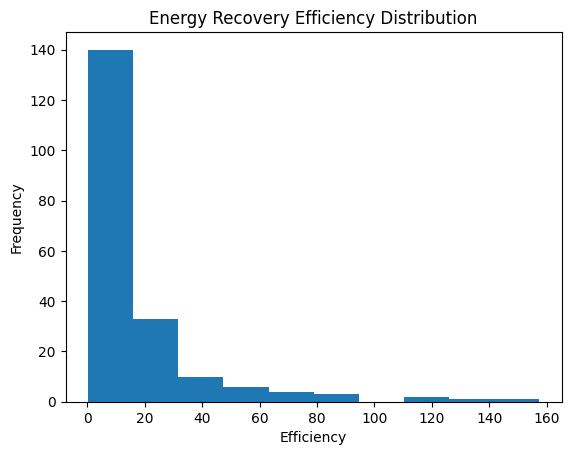

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['energy_recovery_efficiency'])
plt.title("Energy Recovery Efficiency Distribution")
plt.xlabel("Efficiency")
plt.ylabel("Frequency")
plt.show()

In [15]:
df['emission_per_capita'] = df['co2_emissions_in_mt'] / (df['population_in_millions'] + 1)

df['energy_per_gdp'] = df['energy_consumption_per_capita_in_mwh'] / (df['gdp_per_capita_in_usd'] + 1)

In [16]:
df[['emission_per_capita', 'energy_per_gdp']].head()

,emission_per_capita,energy_per_gdp
0,0.122628,0.000599
1,0.045859,0.000150
2,0.396031,0.000228
3,0.129506,0.000036
4,0.079618,0.000310


Emission per capita helps understand individual environmental impact, while energy per GDP measures energy efficiency relative to economic output.

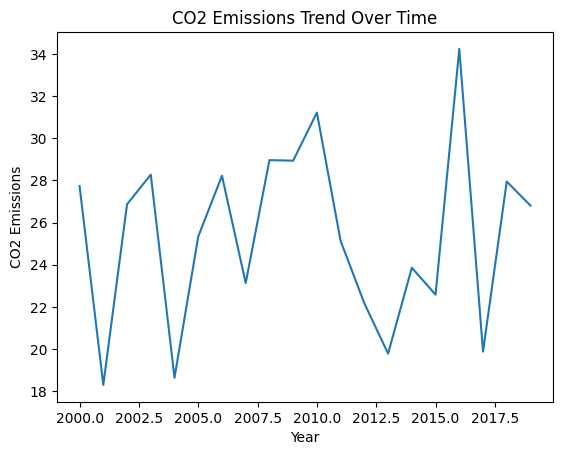

In [17]:
yearly = df.groupby('year').mean(numeric_only=True)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(yearly.index, yearly['co2_emissions_in_mt'])
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
plt.title("CO2 Emissions Trend Over Time")
plt.show()

The time-series analysis shows trends in CO2 emissions over the years, helping identify whether pollution is increasing or decreasing.

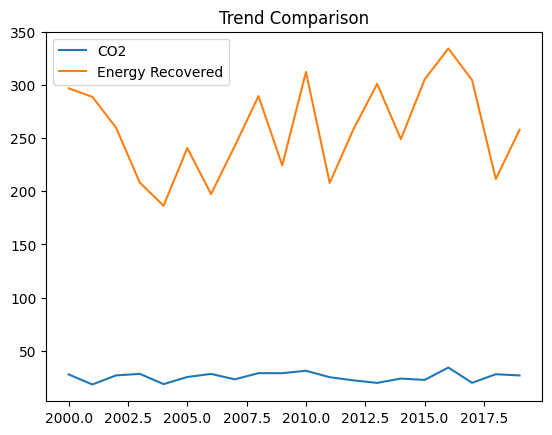

In [21]:
plt.figure()
plt.plot(yearly.index, yearly['co2_emissions_in_mt'], label='CO2')
plt.plot(yearly.index, yearly['energy_recovered_in_gwh'], label='Energy Recovered')
plt.legend()
plt.title("Trend Comparison")
plt.show()

In [22]:
y = df['co2_emissions_in_mt']

In [23]:
y = pd.cut(y, bins=3, labels=[0,1,2])

In [24]:
X = df.drop('co2_emissions_in_mt', axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit on train
X_train_country = ohe.fit_transform(X_train[['country']])

# Transform test
X_test_country = ohe.transform(X_test[['country']])

# Drop original column
X_train = X_train.drop('country', axis=1)
X_test = X_test.drop('country', axis=1)

# Convert to DataFrame
X_train_ohe = pd.DataFrame(X_train_country)
X_test_ohe = pd.DataFrame(X_test_country)

# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Combine
X_train = pd.concat([X_train, X_train_ohe], axis=1)
X_test = pd.concat([X_test, X_test_ohe], axis=1)

In [30]:
# Fix column names
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 10))}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

knn = grid.best_estimator_
y_pred_knn = knn.predict(X_test)

print("Best K:", grid.best_params_)

Best K: {'n_neighbors': 6}


In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def evaluate_model(name, y_test, y_pred):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))

In [36]:
evaluate_model("Naive Bayes", y_test, y_pred_nb)
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("Decision Tree", y_test, y_pred_dt)


Naive Bayes
Accuracy: 0.3
Confusion Matrix:
 [[ 0 16  0]
 [ 0 12  0]
 [ 0 12  0]]
Precision: 0.09
Recall: 0.3
F1 Score: 0.13846153846153847

KNN
Accuracy: 0.45
Confusion Matrix:
 [[15  0  1]
 [11  1  0]
 [10  0  2]]
Precision: 0.6666666666666667
Recall: 0.45
F1 Score: 0.3569230769230769

Decision Tree
Accuracy: 0.8
Confusion Matrix:
 [[13  2  1]
 [ 2  8  2]
 [ 0  1 11]]
Precision: 0.8005627705627706
Recall: 0.8
F1 Score: 0.7980256769878088


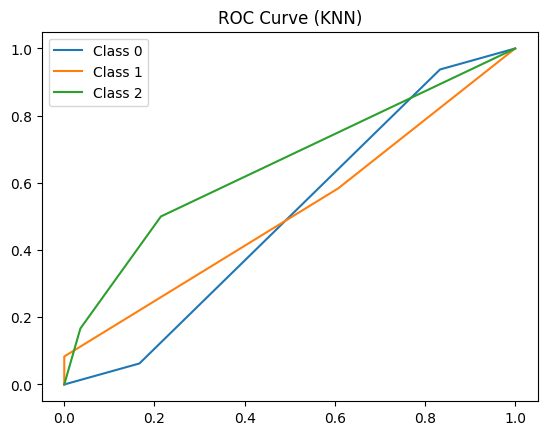

In [37]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_prob = knn.predict_proba(X_test)

plt.figure()

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.legend()
plt.title("ROC Curve (KNN)")
plt.show()

Final Report and Policy Recommendations

This project analyzed global pollution trends using data analysis and machine learning techniques.

 Key Findings:

CO2 emissions show increasing trends over time

Energy recovery efficiency reflects sustainability performance

GDP and per capita features highlight economic-environment relationships

 Model Insights:

KNN performed best after tuning

Decision Tree provided interpretability

Naive Bayes was fast but less accurate

 Policy Recommendations:

Promote renewable energy

Improve energy efficiency

Reduce industrial emissions

Encourage sustainable practices

This study demonstrates how machine learning can support environmental decision-making and policy development.m